# **Example of implementation**

In [1]:
# Example of using letter-value plots to remove outlier pixel values on a single-band remote sensing imagery
# Code provided by Syam'ani (https://github.com/syamaniulm)

In [2]:
"""
Required packages:
------------------
Rasterio
NumPy
SciPy
Seaborn
"""

'\nRequired packages:\n------------------\nRasterio\nNumPy\nSciPy\nSeaborn\n'

In [3]:
"""
Letter-value plots citation:

Hofmann, H., Wickham, H., & Kafadar, K. (2017).
Letter-Value Plots: Boxplots for Large Data.
Journal of Computational and Graphical Statistics, 26(3), 469–477.
https://doi.org/10.1080/10618600.2017.1305277.
"""

'\nLetter-value plots citation:\n\nHofmann, H., Wickham, H., & Kafadar, K. (2017).\nLetter-Value Plots: Boxplots for Large Data.\nJournal of Computational and Graphical Statistics, 26(3), 469–477.\nhttps://doi.org/10.1080/10618600.2017.1305277.\n'

In [4]:
import rasterio
import numpy as np

from rasterio import plot

# Opening a multispectral remote sensing imagery in a local drive
with rasterio.open('./imagery/S2_Muara_Barito.tif') as s2_image:
  
  img_profile = s2_image.profile
  img_width = s2_image.width
  img_height = s2_image.height
  img_band = s2_image.count

  image = np.empty((img_height, img_width, img_band))

  for i in range(img_band):
    image[:,:,i] = s2_image.read(i+1)

In [5]:
# Transforming the image using exponential Simple Ratio (SR)

red = image[:,:,4]
nir = image[:,:,8]

sr = np.exp(nir / red)

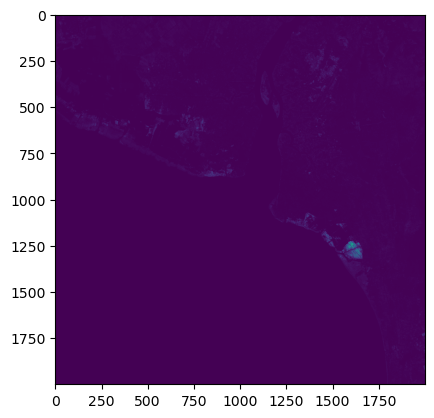

<Axes: >

In [6]:
# Displaying the transformed image

plot.show(sr)

Starting Letter-value plots computation...
The value 0 in the original image is excluded in the calculation...
Constructing Letter-value plots using 'proportion'...
Left outlier fence  : 1.394636
Right outlier fence : 105.525387
Removing outliers only on the right side...
Replacing right side outliers using 0...
Letter-value plots computation completed...


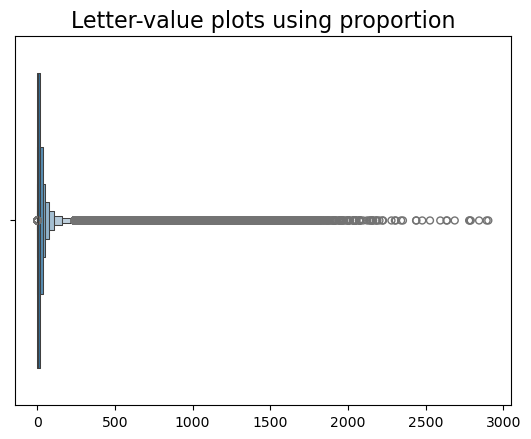

In [7]:
# Cleaning pixel outliers using letter-value plots

from LvPlots import LvPlots

sr_cleaned = LvPlots.lvplots(sr, rule='proportion', ol_prop=0.01, side='right')

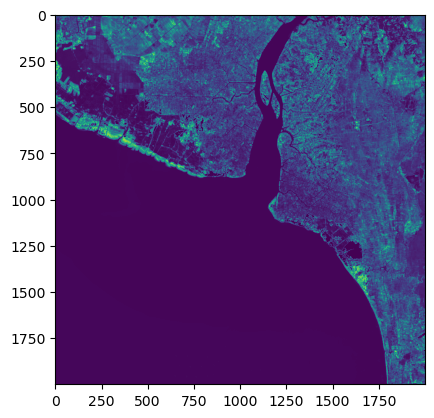

<Axes: >

In [8]:
# Displaying the cleaned image

plot.show(sr_cleaned)